<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/Basic_Image_Studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Megvilágosodás

Irhattam volna csupa nagybetűvel is.

Két kísérlet jutott eszembe, de lehet, hogy csak az egyiket fogom megcsinálni, mindenesetre röggtön két frameworkben. Kerasban és Scikit Learnben. Ha már nagyon jó leszek akkor megcsinálom PyTorchban.

Nos a megvilágosodás.

Vegyük a két alapesetet.

Osztályozás (ahogy én szeretem hívni klasszifikáció) és regresszó.

Nézzük a következő esetet. Van két darab (igen 2 db) képünk.

Szeretnénk megtanítani egy algoritmusnak, hogy tudjon különbséget tenni a két kép között. Kismillió módszer létezik, de most vegyünk egy neurális hálót. Az egyszerűség kedvéért legyen egy nem túl nagy négyzetes kép egyenló oldal hosszúsággal.

Hogyan tanítjuk fel két kép alapján a neurális hálót?

Leginkább sehogyan, de ha mégis akkor gondoljok végig magának a tanulásnak a folyamatát. A Backprop vagyis az Error Backprop és a Gradiesn Descent a hiba alapján működik.

Nos két kép esetén mi lesz a hiba?

A tanítás során a következő lehetőségek lépnek fel.
1. egyszerre egy képet adunk oda egy iterációban, ezalapján kiszámolja a hibát és módosít a rendszeren.
2. mindkét képet odaadjuk egy iteráció során. Ekkor vagy minkettőt helyesen klasszifikálja, vagy egyiket, vagy másikat helyesen klasszifikálja, de olyan nincs, hogy egyiket sem klasszifikálja helyesen. Tegyük fel, hogy Binary Classification-ról van szó.

Nos akkor nézzük meg, hogy ezekben az esetekben, hogyan szökkenthető a hiba?

Hogyan csökkenthető, ha összesen két, vagy három kimenete van?

Tegyük hozzá, hogy maga a hiba nem dichotom, hanem SoftMax esetén egy folytonos változó.!



In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [6]:
%%capture
!rm *.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png

In [25]:
import skimage.io
import skimage.transform

In [10]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


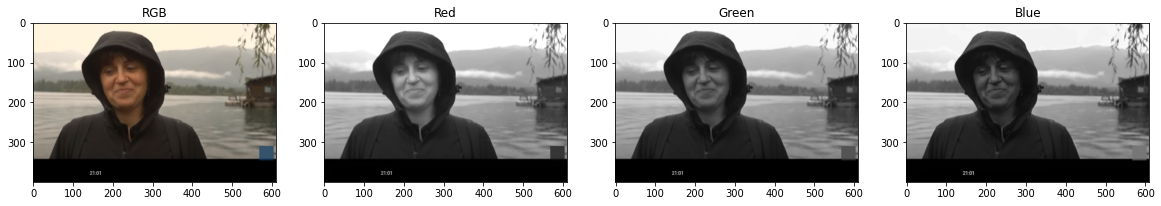

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [13]:
pic2 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

print(type(pic2))

print(pic2.shape)

red2   = pic2[:, :, 0]
green2 = pic2[:, :, 1]
blue2  = pic2[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


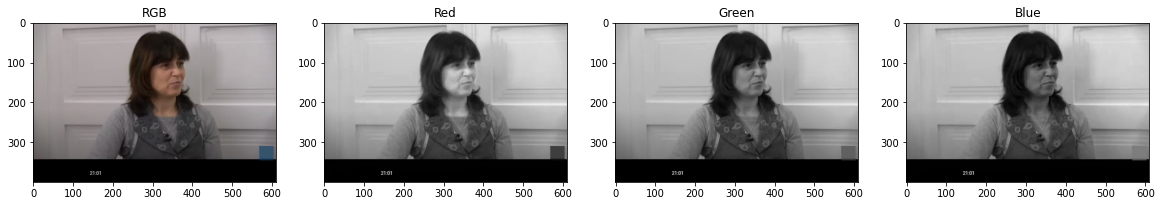

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic2, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red2, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green2, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue2, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [45]:
def get_picture(file = 'https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png'):
  pic = skimage.io.imread(file)

  print(type(pic))
  print(pic.shape)

  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  return pic, red, green, blue


def show_irgb(pic):
  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('RGB')
  ax2.imshow(red, cmap='gray'); ax2.set_title('Red')
  ax3.imshow(green, cmap='gray'); ax3.set_title('Green')
  ax4.imshow(blue, cmap='gray'); ax4.set_title('Blue')

  plt.show()

def show_gray(pic):
  fig, (ax1) = plt.subplots(1, 1, figsize=(5, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('Gray')

  plt.show()

def crop_img(pic, x, y, w, h):
  red_   = pic[y:y+h, x:x+w, 0]
  green_ = pic[y:y+h, x:x+w, 1]
  blue_  = pic[y:y+h, x:x+w, 2]
  pic_   = pic[y:y+h, x:x+w, :]

  return pic_, red_, green_, blue_

def resize_img(pic, w, h):
  pic_ = skimage.transform.resize(pic, (w, h))

  red_   = pic_[:, :, 0]
  green_ = pic_[:, :, 1]
  blue_  = pic_[:, :, 2]

  return pic_, red_, green_, blue_

def to_gray_img(pic):

  grey_ = (pic[:, :, 0] + pic[:, :, 1] + pic[:, :, 0])/3

  return grey_


<class 'numpy.ndarray'>
(400, 610, 3)


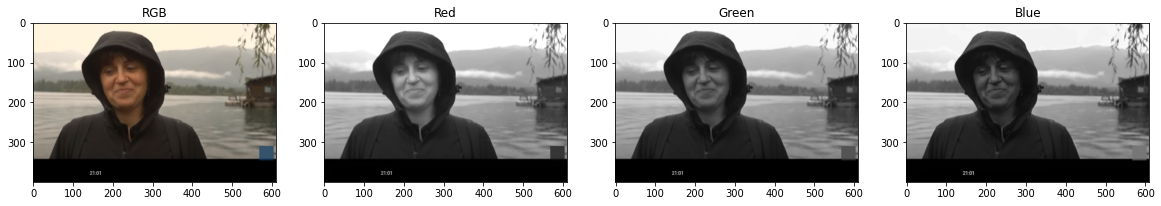

In [17]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

show_irgb(img)

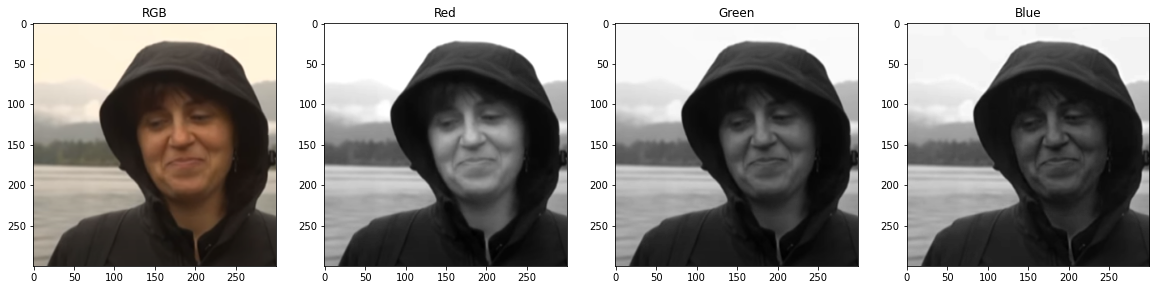

In [24]:
croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

show_irgb(croped_img)


<class 'numpy.ndarray'>
(400, 610, 3)


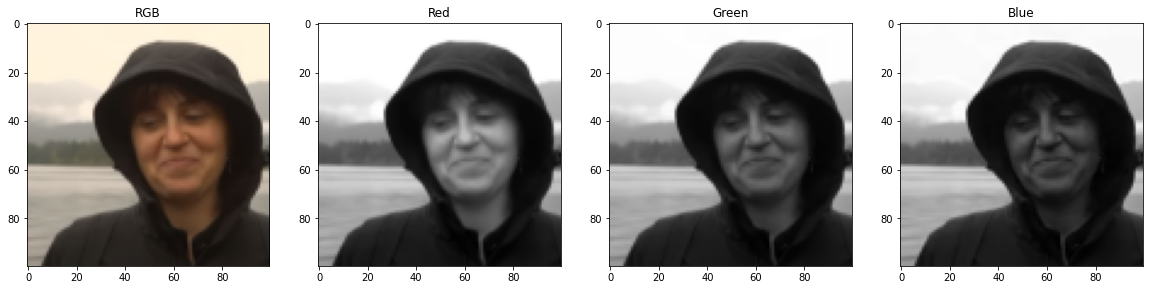

In [32]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman1 = resized_img

show_irgb(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


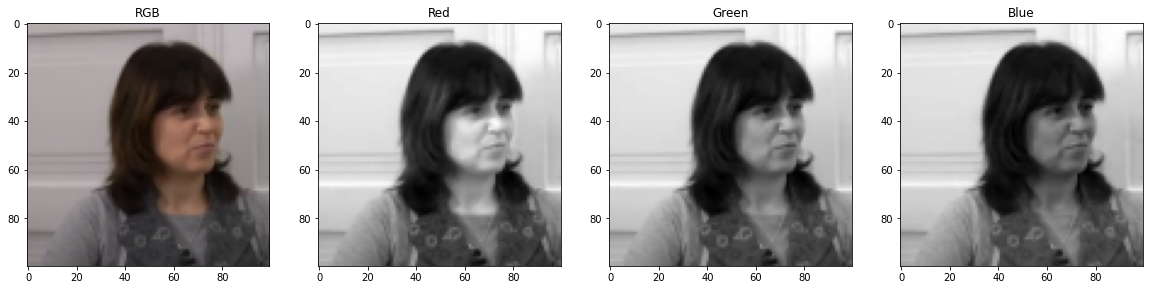

In [35]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman2 = resized_img

show_irgb(woman2)

<class 'numpy.ndarray'>
(400, 610, 3)


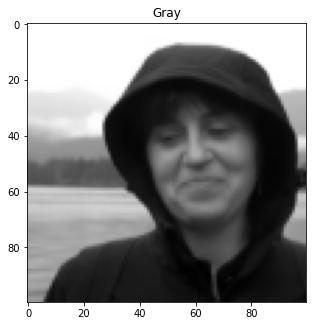

In [47]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman1 = gray_img

show_gray(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


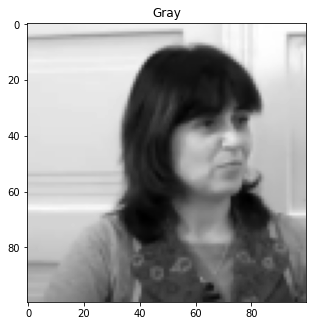

In [50]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman2 = gray_img

show_gray(woman2)

# Készítsük elő a tanulásra az adatokat a klasszifikációhoz

Sok sok transzformáció, hogy a gépi tanuláshoz szükséges könyvtárak számára emészthető formába hozzuk.

In [60]:
X1 = woman1.ravel()
X2 = woman2.ravel()

print(X1.shape)
print(X2.shape)

X = np.array([X1, X2])

print(X.shape)

y = np.array([0, 1])

# donthetünk úgy is, hogy One-Hot Encode legyen
one_hot_1 = np.array([1.0, 0.0])
one_hot_2 = np.array([0.0, 1.0])
y = np.array([one_hot_1, one_hot_2])
# vagy simán csak így
y = np.array([np.array([1.0, 0.0]), np.array([0.0, 1.0])])

print(y.shape)

(10000,)
(10000,)
(2, 10000)
(2, 2)


In [65]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                    activation='relu',
                    solver='adam',
                    batch_size=1,
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    max_iter=200,
                    shuffle=False,
                    random_state=1,
                    verbose=0,
                    validation_fraction=0.0,
                    n_iter_no_change=200)

In [66]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

mlp.fit(X, y)

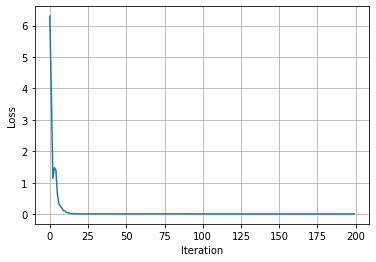

In [78]:
def plot_loss(mlp):
  plt.figure(figsize=(6, 4))
  plt.plot(mlp.loss_curve_)
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.grid()
  plt.show()

plot_loss(mlp)

# Save and Load model

In [72]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)



# Visualise net

[  1 100   1]


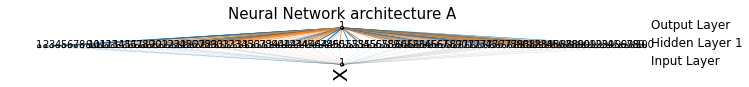

In [70]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

num_input_varialbe = ['X']

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(mlp.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, mlp.coefs_, num_input_varialbe)
network.draw()